# Actividad de clase para irnos antes
1. Abrir el dataset de cat.mat y usa la data de 'Names' y 'CIJctx'
2. Generar el mapa de calor del dataframe asociado
    1. Las columnas y las filas deben tener los nombres de los canales
3. Generar el histograma del dataset y determinar el porcentaje de cada valor
4. Filtrar el dataset con los valores =1, =2, =3
    1. Con cada filtrado,que porcentaje de datos se están eliminando?
5. Generar el mapa de calor de cada dataset filtrado
6. Generar el grafo 2d de cada dataset filtrado

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import scipy.io

In [5]:
file_path = "C:/Users/nicol/OneDrive/Documentos/GitHub/Neurociencias-2026-1/S03_datasets/BCT/cat.mat"
file_dict = scipy.io.loadmat(file_path)
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed May 29 16:24:29 2013',
 '__version__': '1.0',
 '__globals__': [],
 'CIJall': array([[0, 3, 3, ..., 0, 0, 0],
        [3, 0, 3, ..., 0, 0, 0],
        [3, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(95, 95), dtype=uint8),
 'CIJctx': array([[0, 3, 3, ..., 0, 0, 0],
        [3, 0, 3, ..., 0, 0, 0],
        [3, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 3],
        [0, 0, 0, ..., 2, 0, 2],
        [0, 0, 0, ..., 2, 2, 0]], shape=(52, 52), dtype=uint8),
 'Names': array(['    17', '    18', '    19', '  PLLS', '  PMLS', '  AMLS',
        '  ALLS', '   VLS', '   DLS', '   21a', '   21b', '   20a',
        '   20b', '     7', '   AES', '    PS', '    AI', '   AII',
        '   AAF', '     P', '   VPc', '   EPp', '   Tem', '    3a',
        '    3b', '     1', '     2', '   SII', '   SIV', '    4g',
        ' 

In [7]:
matriz= file_dict['CIJctx']
columnas= file_dict['Names']
matriz.shape, len(columnas)

((52, 52), 52)

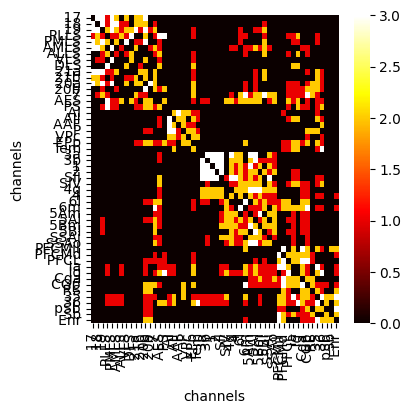

In [12]:
cat_df = pd.DataFrame(data=matriz, columns=columnas, index=columnas)

plt.figure(figsize=(4,4))
ax = sns.heatmap(cat_df.values,
                 annot=False, cmap='hot', fmt='.2f',
                 xticklabels=cat_df.columns,yticklabels=cat_df.index)
ax.set(xlabel='channels', ylabel='channels')
plt.show()

<BarContainer object of 4 artists>

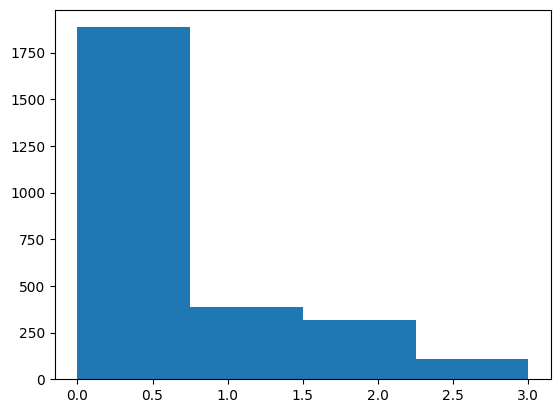

In [13]:
matriz= cat_df.values
frec,bins,h= plt.hist(matriz.ravel(), bins=4)
h

In [14]:
frec

array([1886.,  389.,  319.,  110.])

In [15]:
porcentaje = (frec / frec.sum()) * 100
print("Porcentajes (%):", porcentaje)

Porcentajes (%): [69.74852071 14.38609467 11.79733728  4.06804734]


In [17]:
cat_df_1 = cat_df[cat_df <= 1]
cat_df_2 = cat_df[cat_df <= 2]
cat_df_3 = cat_df[cat_df <= 3]